# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Mario Bros Style

Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/WonderWoman.png")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-13 16:37:22.785664: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=10153.36
Iteration 200: loss=6451.05
Iteration 300: loss=4970.91
Iteration 400: loss=4125.93
Iteration 500: loss=3567.44
Iteration 600: loss=3174.25
Iteration 700: loss=2880.26
Iteration 800: loss=2650.69
Iteration 900: loss=2467.33
Iteration 1000: loss=2317.77
Iteration 1100: loss=2192.42
Iteration 1200: loss=2085.80
Iteration 1300: loss=1993.44
Iteration 1400: loss=1912.86
Iteration 1500: loss=1841.81
Iteration 1600: loss=1779.14
Iteration 1700: loss=1723.72
Iteration 1800: loss=1674.41
Iteration 1900: loss=1630.16
Iteration 2000: loss=1590.26
Iteration 2100: loss=1554.02
Iteration 2200: loss=1521.12
Iteration 2300: loss=1491.09
Iteration 2400: loss=1463.40
Iteration 2500: loss=1437.92
Iteration 2600: loss=1414.53
Iteration 2700: loss=1392.89
Iteration 2800: loss=1372.93
Iteration 2900: loss=1354.49
Iteration 3000: loss=1337.31
Iteration 3100: loss=1321.20
Iteration 3200: loss=1306.13
Iteration 3300: loss=1292.00
Iteration 3400: loss=1278.77
Iteration 3500: loss=1

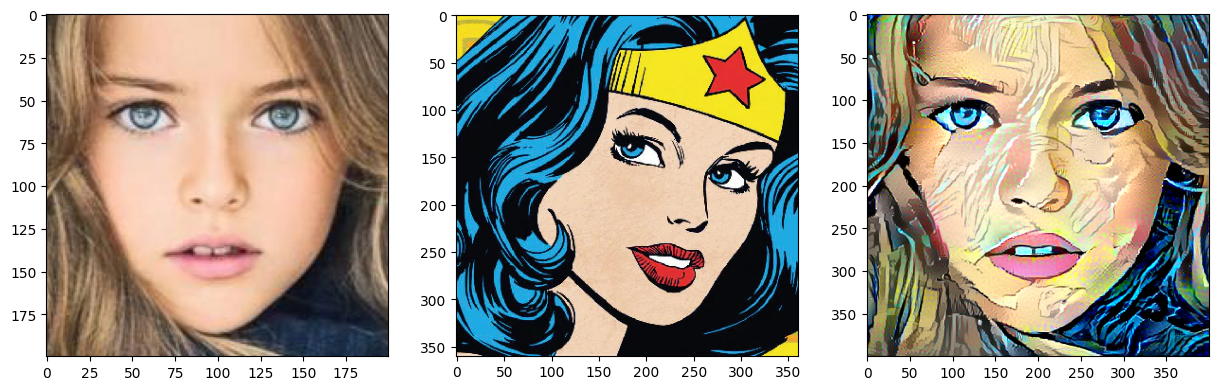

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Superheroes/WonderWoman_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=3820.29
Iteration 200: loss=2587.19
Iteration 300: loss=2087.87
Iteration 400: loss=1802.43
Iteration 500: loss=1611.47
Iteration 600: loss=1473.15
Iteration 700: loss=1367.41
Iteration 800: loss=1282.60
Iteration 900: loss=1213.69
Iteration 1000: loss=1156.15
Iteration 1100: loss=1107.45
Iteration 1200: loss=1065.52
Iteration 1300: loss=1029.02
Iteration 1400: loss=997.05
Iteration 1500: loss=968.82
Iteration 1600: loss=943.75
Iteration 1700: loss=921.27
Iteration 1800: loss=901.04
Iteration 1900: loss=882.77
Iteration 2000: loss=866.20
Iteration 2100: loss=851.03
Iteration 2200: loss=837.08
Iteration 2300: loss=824.35
Iteration 2400: loss=812.71
Iteration 2500: loss=801.94
Iteration 2600: loss=792.02
Iteration 2700: loss=782.86
Iteration 2800: loss=774.36
Iteration 2900: loss=766.46
Iteration 3000: loss=759.11
Iteration 3100: loss=752.24
Iteration 3200: loss=745.81
Iteration 3300: loss=739.79
Iteration 3400: loss=734.15
Iteration 3500: loss=728.85
Iteration 3600: 

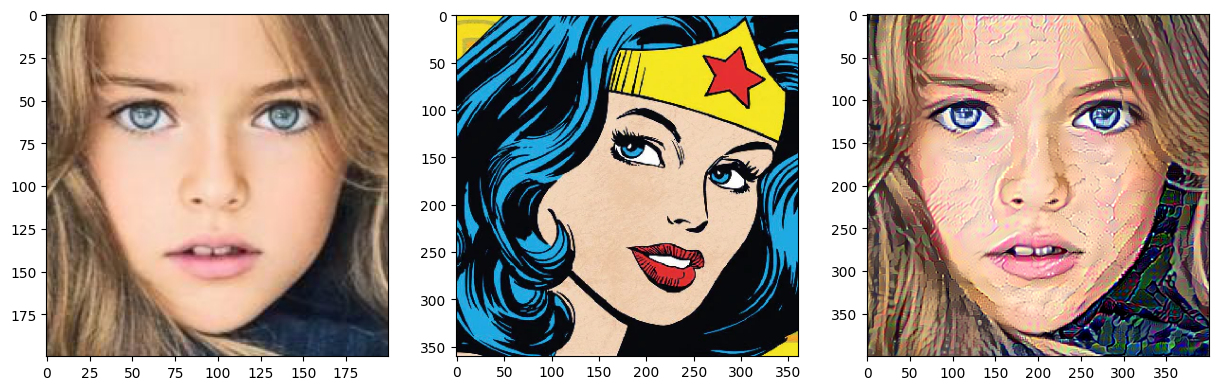

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Superheroes/WonderWoman_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=11284.69
Iteration 200: loss=7454.32
Iteration 300: loss=5934.57
Iteration 400: loss=5072.67
Iteration 500: loss=4502.54
Iteration 600: loss=4093.98
Iteration 700: loss=3788.02
Iteration 800: loss=3549.80
Iteration 900: loss=3357.30
Iteration 1000: loss=3196.72
Iteration 1100: loss=3061.54
Iteration 1200: loss=2946.80
Iteration 1300: loss=2848.41
Iteration 1400: loss=2761.86
Iteration 1500: loss=2685.25
Iteration 1600: loss=2617.16
Iteration 1700: loss=2556.01
Iteration 1800: loss=2500.97
Iteration 1900: loss=2451.57
Iteration 2000: loss=2406.81
Iteration 2100: loss=2366.17
Iteration 2200: loss=2328.98
Iteration 2300: loss=2294.82
Iteration 2400: loss=2263.59
Iteration 2500: loss=2234.71
Iteration 2600: loss=2207.88
Iteration 2700: loss=2182.99
Iteration 2800: loss=2159.90
Iteration 2900: loss=2138.60
Iteration 3000: loss=2118.88
Iteration 3100: loss=2100.50
Iteration 3200: loss=2083.34
Iteration 3300: loss=2067.19
Iteration 3400: loss=2052.00
Iteration 3500: loss=2

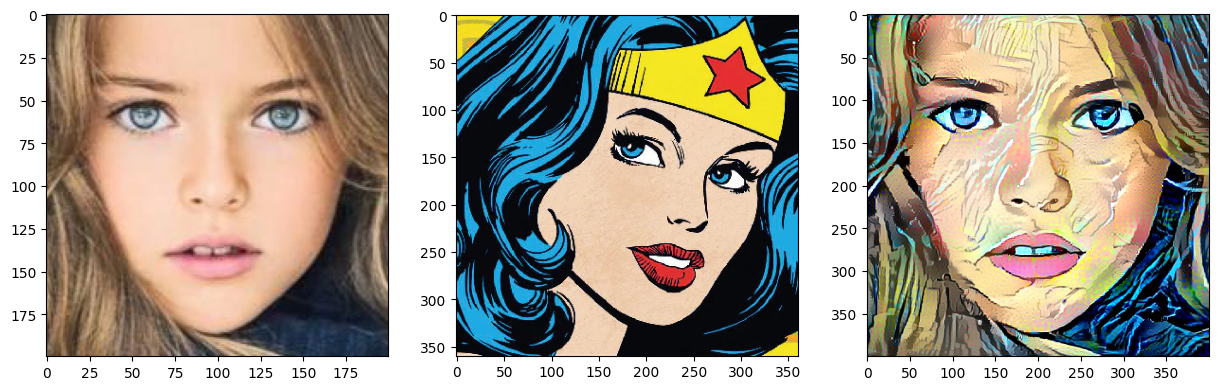

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Superheroes/WonderWoman_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=3134.10
Iteration 200: loss=2046.13
Iteration 300: loss=1618.31
Iteration 400: loss=1369.81
Iteration 500: loss=1202.04
Iteration 600: loss=1080.20
Iteration 700: loss=987.60
Iteration 800: loss=914.50
Iteration 900: loss=855.06
Iteration 1000: loss=805.93
Iteration 1100: loss=764.40
Iteration 1200: loss=729.00
Iteration 1300: loss=698.35
Iteration 1400: loss=671.46
Iteration 1500: loss=647.73
Iteration 1600: loss=626.73
Iteration 1700: loss=608.02
Iteration 1800: loss=591.30
Iteration 1900: loss=576.27
Iteration 2000: loss=562.68
Iteration 2100: loss=550.38
Iteration 2200: loss=539.19
Iteration 2300: loss=528.97
Iteration 2400: loss=519.60
Iteration 2500: loss=510.99
Iteration 2600: loss=503.06
Iteration 2700: loss=495.72
Iteration 2800: loss=488.93
Iteration 2900: loss=482.61
Iteration 3000: loss=476.75
Iteration 3100: loss=471.31
Iteration 3200: loss=466.22
Iteration 3300: loss=461.46
Iteration 3400: loss=457.00
Iteration 3500: loss=452.83
Iteration 3600: loss=44

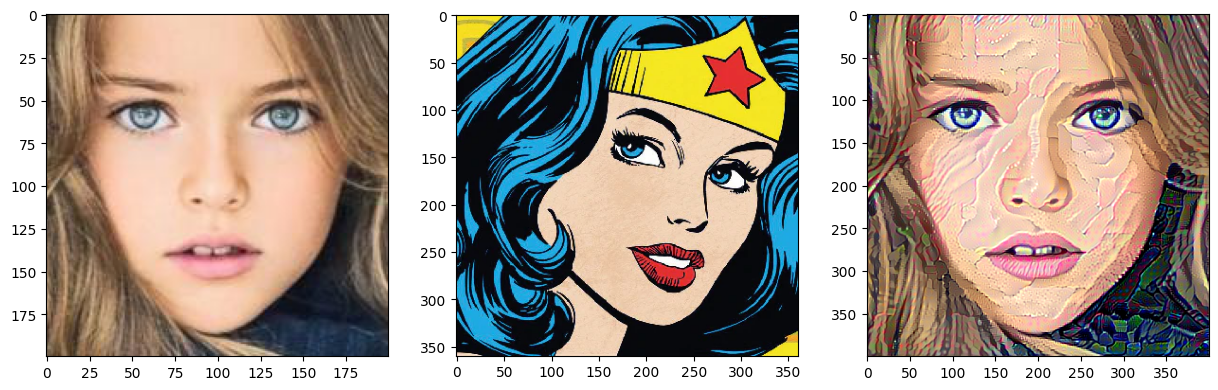

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Superheroes/WonderWoman_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=6377.18
Iteration 200: loss=3903.39
Iteration 300: loss=2936.32
Iteration 400: loss=2412.83
Iteration 500: loss=2084.50
Iteration 600: loss=1853.65
Iteration 700: loss=1683.37
Iteration 800: loss=1552.58
Iteration 900: loss=1448.72
Iteration 1000: loss=1364.50
Iteration 1100: loss=1294.56
Iteration 1200: loss=1234.99
Iteration 1300: loss=1183.81
Iteration 1400: loss=1139.58
Iteration 1500: loss=1100.97
Iteration 1600: loss=1066.73
Iteration 1700: loss=1036.37
Iteration 1800: loss=1009.30
Iteration 1900: loss=984.94
Iteration 2000: loss=962.93
Iteration 2100: loss=942.95
Iteration 2200: loss=924.68
Iteration 2300: loss=907.92
Iteration 2400: loss=892.50
Iteration 2500: loss=878.37
Iteration 2600: loss=865.31
Iteration 2700: loss=853.23
Iteration 2800: loss=842.01
Iteration 2900: loss=831.59
Iteration 3000: loss=821.84
Iteration 3100: loss=812.72
Iteration 3200: loss=804.20
Iteration 3300: loss=796.21
Iteration 3400: loss=788.73
Iteration 3500: loss=781.71
Iteration 3

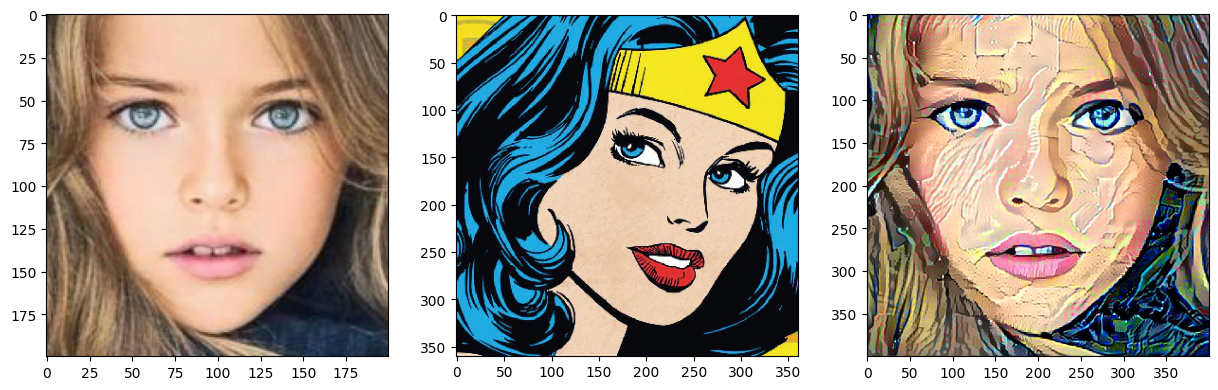

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Superheroes/WonderWoman_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()